___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../figures/capa2.png"/></a>
___
___


# Árvores de Decisão 

## Introdução

Uma árvore de decisão é uma das ferramentas mais poderosas dos algoritmos de aprendizado supervisionado, utilizada tanto para tarefas de classificação quanto para regressão. Ela constrói uma estrutura em forma de árvore, semelhante a um fluxograma, onde cada nó interno representa um teste em um atributo, cada ramo representa um resultado do teste, e cada nó folha (nó terminal) contém um rótulo de classe. A árvore é construída dividindo recursivamente os dados de treinamento em subconjuntos com base nos valores dos atributos, até que um critério de parada seja atingido, como a profundidade máxima da árvore ou o número mínimo de amostras necessário para dividir um nó.

Durante o treinamento, o algoritmo de Árvore de Decisão seleciona o melhor atributo para dividir os dados com base em uma métrica como entropia ou impureza de `Gini`, que mede o nível de impureza ou aleatoriedade nos subconjuntos. O objetivo é encontrar o atributo que maximize o ganho de informação ou a redução na impureza após a divisão. A impureza é zero quando todos os membros de um nó pertencem à mesma classe, e é máxima quando os membros são igualmente divididos entre as classes. O ganho de informação é simplesmente a diferença entre a impureza do nó pai e a soma ponderada da impureza dos nós filhos. O algoritmo continua dividindo os nós até que todos os nós folha contenham apenas dados de uma classe ou quando atingir o critério de parada.

<figure>
<img src="../figures/dtree1.webp" style="width:50%">
<figcaption align = "center"></figcaption>
</figure>

Mas como a árvore de decisão decide qual atributo dividir primeiro? Para responder a essa pergunta, precisamos entender o conceito de entropia. A entropia é uma medida da aleatoriedade ou impureza nos dados. Quanto maior a entropia, maior a incerteza. A entropia é zero quando todos os membros de um nó pertencem à mesma classe, e é máxima quando os membros são igualmente divididos entre as classes. O algoritmo de árvore de decisão seleciona o atributo que produz a menor entropia após a divisão dos dados. Matematicamente, a entropia de um nó é calculada como:

$$ Entropy = - \sum_{i=1}^{c} p_i \log_2 p_i $$

onde $p_i$ é a proporção de membros da classe $i$ em um nó particular. Por exemplo, se um nó contém 4 membros da classe A e 2 membros da classe B, a entropia é calculada como:

$$ Entropy = - \frac{4}{6} \log_2 \frac{4}{6} - \frac{2}{6} \log_2 \frac{2}{6} = 0.918 $$

Então, uma vez que a entropia é calculada para cada atributo, o algoritmo de árvore de decisão seleciona o atributo que produz a menor entropia após a divisão dos dados. A entropia é calculada novamente para os nós filhos e o processo continua até que todos os nós folha contenham apenas dados de uma classe ou quando atingir o critério de parada.

O algoritmo de árvore de decisão também pode usar a impureza de `Gini` para selecionar o atributo que produz a menor impureza após a divisão dos dados. A impureza de `Gini` é calculada como:

$$ Gini = 1 - \sum_{i=1}^{c} p_i^2 $$

onde $p_i$ é a proporção de membros da classe $i$ em um nó particular. Por exemplo, se um nó contém 4 membros da classe A e 2 membros da classe B, a impureza de `Gini` é calculada como:

$$ Gini = 1 - \frac{4}{6}^2 - \frac{2}{6}^2 = 0.444 $$

A impureza de `Gini` é zero quando todos os membros de um nó pertencem à mesma classe, e é máxima quando os membros são igualmente divididos entre as classes. O algoritmo de árvore de decisão seleciona o atributo que produz a menor impureza de `Gini` após a divisão dos dados.
U

A classificação do dataset `Iris` usando o algoritmo de árvore de decisão é mostrada abaixo. O algoritmo de árvore de decisão seleciona o atributo `setosa` para dividir os dados, pois produz a menor entropia após a divisão dos dados. A entropia é calculada novamente para os nós filhos e o processo continua até que todos os nós folha contenham apenas dados de uma classe ou quando atingir o critério de parada.

<figure>
<img src="../figures/dtree2.webp" style="width:80%">
<figcaption align = "center"></figcaption>
</figure>

## Implementação no Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset

Neste tutorial vamos analisar o dataset de Kyphosis - Cifose. Ele tem dados de pacientes que tiveram uma condição médica chamada "kyphosis" e tentamos prever se a operação foi bem sucedida ou não ou seja se a condição foi corrigida ou não.

**Classificação da Doença de Cifose**

**Declaração do Problema:**
A cifose é uma curvatura excessivamente convexa anormal da coluna vertebral. O conjunto de dados sobre cifose possui 81 linhas e 4 colunas, representando dados de crianças que passaram por cirurgia corretiva na coluna vertebral. O conjunto de dados contém 3 entradas e 1 saída.

**Entradas:**

1. **Age:** em meses
2. **Number:** o número de vértebras envolvidas
3. **Start:** o número da primeira vértebra (a mais superior) operada.

**Saída:**

- **Kyphosis:** um fator com níveis "ausente" e "presente", indicando se a cifose (um tipo de deformação) estava presente após a operação.

**Link para o conjunto de dados:**
[https://www.kaggle.com/abbasit/kyphosis-dataset](https://www.kaggle.com/abbasit/kyphosis-dataset)

Este conjunto de dados é valioso para a análise e predição da presença de cifose em crianças após a cirurgia corretiva na coluna vertebral. A compreensão das relações entre a idade, o número de vértebras envolvidas e a primeira vértebra operada pode fornecer insights importantes para a prevenção e tratamento dessa condição. O objetivo é desenvolver modelos de classificação que possam ajudar na identificação precoce da cifose e facilitar decisões clínicas mais informadas.


In [2]:
data_folder = '../data/'
df = pd.read_csv(data_folder + 'kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### EDA

Vamos apenas verificar um gráfico de pares simples para este pequeno conjunto de dados.

/home/vahid/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


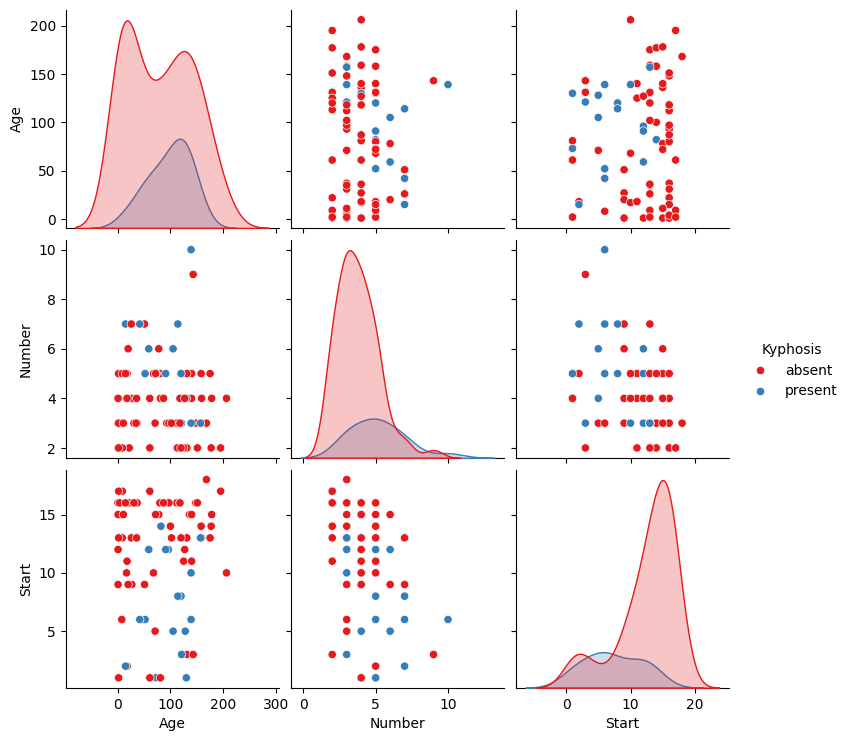

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

### Train Test Split

Vamos dividir os dados em um conjunto de treinamento e um conjunto de teste!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Treinando o Modelo de Árvore de Decisão

Começaremos apenas treinando uma única árvore de decisão.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Previsão e avaliação

Vamos avaliar nossa árvore de decisão.

In [11]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.82      0.70      0.76        20
     present       0.25      0.40      0.31         5

    accuracy                           0.64        25
   macro avg       0.54      0.55      0.53        25
weighted avg       0.71      0.64      0.67        25



In [16]:
print(confusion_matrix(y_test,predictions))

[[14  6]
 [ 3  2]]


### Visualização da Árvore

O Scikit Learn realmente possui alguns recursos de visualização integrados para árvores de decisão, você não usará isso com frequência e requer que você instale a biblioteca pydot, mas aqui está um exemplo de sua aparência e o código para executá-lo:

[Text(0.4583333333333333, 0.9285714285714286, 'x[2] <= 7.5\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.2222222222222222, 0.7857142857142857, 'x[0] <= 11.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.16666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2777777777777778, 0.6428571428571429, 'x[2] <= 4.0\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= 8.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[0] <= 67.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[0] <= 16.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05555555555555555, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2222222222222222, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.277

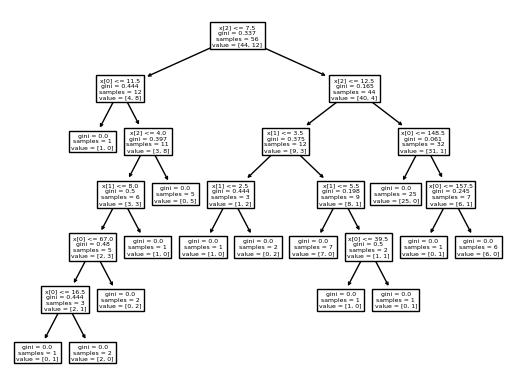

In [17]:
from sklearn import tree

tree.plot_tree(dtree)

In [18]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

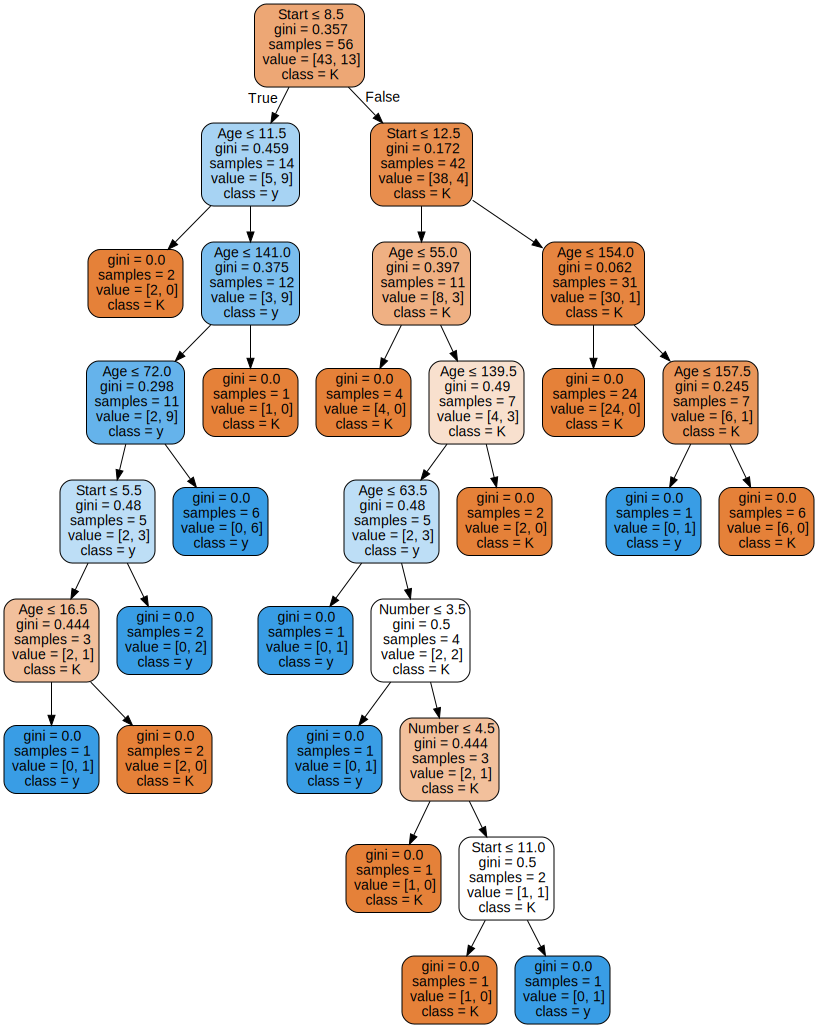

In [26]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Que a Força Esteja Com Você!